# **1. Dataset Introduction**: Marketing Campaign

- **Acknoledgement**: This dataset is sourced from the book "*Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner*" by O. Parr-Rud (SAS Institute, 2014).


## **A. Context**
* **Why is this problem important to solve?**

This problem is important to solve because customer segmentation is a crucial aspect of marketing operations for businesses and organizations. By dividing a dataset of customers into groups of similar customers based on specific common characteristics, we can better understand the various needs and motivations of customers. Customer segmentation allows businesses and organizations to achieve efficient marketing efforts and obtain better return on investment because it allows them to know how to effectively use their money, time, and other resources to target the correct customer groups and create a personalized experience.

### **The objectives**
* **What is the intended goal?**

The intended goal of customer segmentation is to divide the dataset of customers into groups based on certain common characteristics. The customer groups created will highlight the unique needs, motivations, and interests, which can then be used by businesses and organizations to implement an efficient marketing strategy.

### **The key questions**
* **What are the key questions that need to be answered?**

The key questions that need to be answered include the following:

1. Are there any issues with the data that we need to address before analyzing?
2. Which variables should we use for clustering?
3. What characteristics are common among the customers in the dataset to create customer groups?
4. What variables can we create to further analyze the data?

### **The problem formulation**
- **What is it that we are trying to solve using data science?**

We are trying to create customer groups based on similar characteristics among the customers in the dataset so we can effectively target customer segments and create customized communications and offerings.

## **B. Dataset Description**
The dataset could be divided into 4 groups as below:

**1. Customer**
  - ID: Unique customer identifier
  - Year_Birth: Customer's year of birth
  - Education: Customer's level of education
  - Marital_Status: Customer's marital status
  - Income: Customer's annual household income
  - Kidhome: Number of children in the household
  - Teenhome: Number of teenagers in the household
  - Dt_Customer: Date the customer enrolled with the company
  - Recency: Number of days since the last purchase
  - Complain: Indicates if the customer filed a complaint in the last 2 years (1 = Yes, 0 = No)

**2. Products**
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat products in the last 2 years
- MntFishProducts: Amount spent on fish products in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold products in the last 2 years

**3. Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: Accepted the offer in the 1st campaign (1 = Yes, 0 = No)
- AcceptedCmp2: Accepted the offer in the 2nd campaign (1 = Yes, 0 = No)
- AcceptedCmp3: Accepted the offer in the 3rd campaign (1 = Yes, 0 = No)
- AcceptedCmp4: Accepted the offer in the 4th campaign (1 = Yes, 0 = No)
- AcceptedCmp5: Accepted the offer in the 5th campaign (1 = Yes, 0 = No)
- Response: Accepted the offer in the last campaign (1 = Yes, 0 = No)

**4. Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made via catalogues
- NumStorePurchases: Number of purchases made in stores
- NumWebVisitsMonth: Number of website visits in the last month

# **2. Exploratory Data Analysis**

## **A. Data Cleaning**
In this **section A**, we're going to:

*   Import and summarize information about the dataset
*   Find any missing values and decide what to do with rows with missing values


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from matplotlib import colors
from sklearn.decomposition import PCA
import sweetviz as sv


In [43]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [44]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

=> Using the info function, we can pull the following information from the dataset :
- **Data type**: 3 categorical variables, 26 numerical variables
- **Missing values**: Income variable (2216) vs. others (2240)
- **Comment**: Missing data exists only in one column and constitutes only a small proportion (24 out of 2240) of the total data, we have decided to drop these missing values since it don't significantly affect the overall integrity of the data.

In [46]:
df = df.dropna()
df.duplicated().sum()

np.int64(0)

In [47]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")

In [48]:
data = data.dropna()

In [49]:
import warnings

if not hasattr(np, 'VisibleDeprecationWarning'):
    class VisibleDeprecationWarning(DeprecationWarning):
        pass
    np.VisibleDeprecationWarning = VisibleDeprecationWarning
report = sv.analyze(df)


                                             |          | [  0%]   00:00 -> (? left)

In [50]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## **B. Feature Engineering**
In this **section B**, we're going to:
*   Simplify categorical data by reducing the number of unique values
 * Categorize **Marital_Status** column into "***Relationship***" and "***Alone***";
 * Categorize **Education** column into "***Undergraduate***" and "***Postgraduate***".
*   Create new variables based on values from original dataset  
 * Create **Years_Since_Registration** to calculate the customer seniority by calculating the number of years since they joined using **DtCustomer** column;
 * Create **Age** column using the **Year_Birth** column;
 * Create **Spending** as the sum of the amount spent on the 6 product categories: **MntFishProducts**, **MntMeatProducts**, **MntFruits**, **MntSweetProducts**, **MntWines**, **MntGoldProds**;
   * Create **Children** as the sum of the **Kidhome** and **Teenhome** columns.
   * Creating **TotalAcceptedCmp** by adding all the campaign related variables to get the total number of accepted campaigns by a customer
* Visualize each variable individually to understand their distributions and identify potential patterns or trends in the data.
*   Choose certain columns to keep to reduce number of dimensions
* Remove outliers (if needed)




In [51]:
# List of the categorical columns in the data
cols = ["Marital_Status", "Education", "Kidhome", "Teenhome", "Complain"]

# Number of unique observations in each category
for column in cols:
    print("Unique values in", column, "are :")
    print(df[column].nunique())
    print("*" * 50)

Unique values in Marital_Status are :
8
**************************************************
Unique values in Education are :
5
**************************************************
Unique values in Kidhome are :
3
**************************************************
Unique values in Teenhome are :
3
**************************************************
Unique values in Complain are :
2
**************************************************


In [52]:
# Function to create horizontal bar plots with percentages displayed on each bar
def perc_on_bar_horizontal(z):
    total = len(df[z])                                          # Length of the column
    plt.figure(figsize=(15, 5))

    # Create the countplot with sorted order based on value counts (horizontal bar plot)
    ax = sns.countplot(y=df[z], palette='Paired', order=df[z].value_counts().index)

    # Loop through each bar and annotate percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)  # Calculate percentage
        x = p.get_width()                                           # X-coordinate for annotation
        y = p.get_y() + p.get_height() / 2                          # Y-coordinate for annotation (centered)
        ax.annotate(percentage, (x, y), ha='left', va='center', size=12)  # Annotate the percentage

    plt.ylabel(z)
    plt.xlabel('Count')
    plt.title(f'Percentage of {z} Categories')
    plt.tight_layout()
    plt.show()


#### Marital Status

C:\Users\MAY02\AppData\Local\Temp\ipykernel_12656\2312310877.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[z], palette='Paired', order=df[z].value_counts().index)


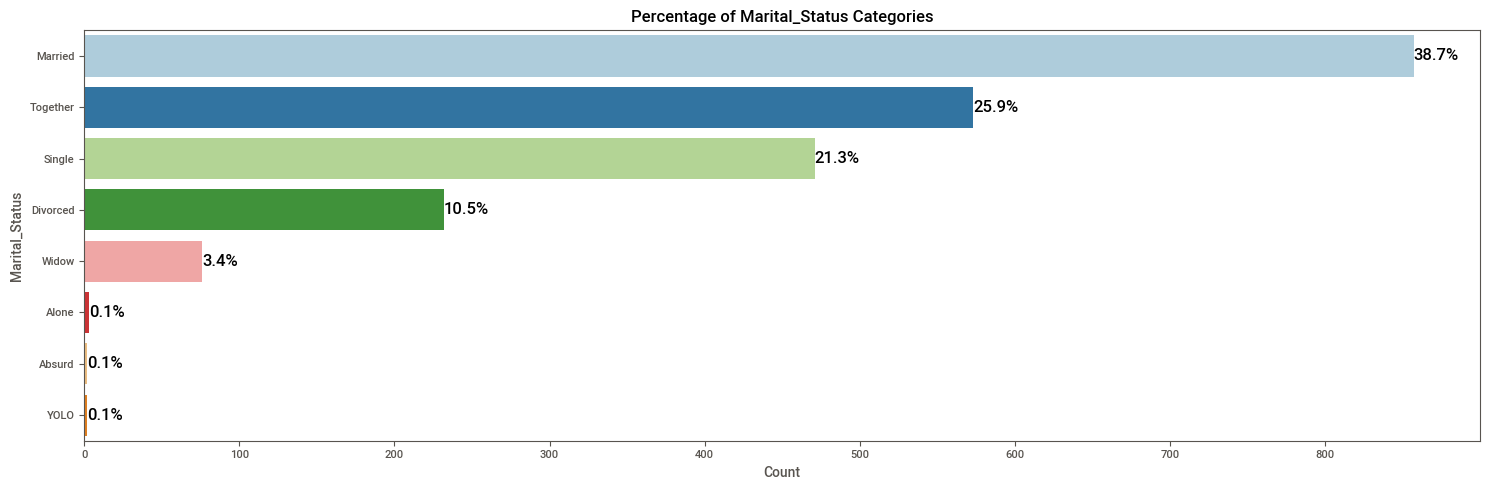

In [53]:
# Bar plot for 'Marital_Status'
perc_on_bar_horizontal('Marital_Status')

In [54]:
df.Marital_Status.value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [55]:
# Simplify the Marital_Status column
df = df[(df.Marital_Status != 'YOLO') & (df.Marital_Status != 'Absurd')] # drop meaningless values

def married_single(x):
    relationship = {
        'Married' :'Relationship',
        'Together':'Relationship',
        'Single'  :'Alone',
        'Divorced':'Alone',
        'Widow'   :'Alone',
        'Alone'   :'Alone'
    }

    return relationship[x]

df['Marital_Status'] = df.Marital_Status.apply(married_single)

In [56]:
df.Marital_Status.value_counts()

Marital_Status
Relationship    1430
Alone            782
Name: count, dtype: int64

#### Education

C:\Users\MAY02\AppData\Local\Temp\ipykernel_12656\2312310877.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[z], palette='Paired', order=df[z].value_counts().index)


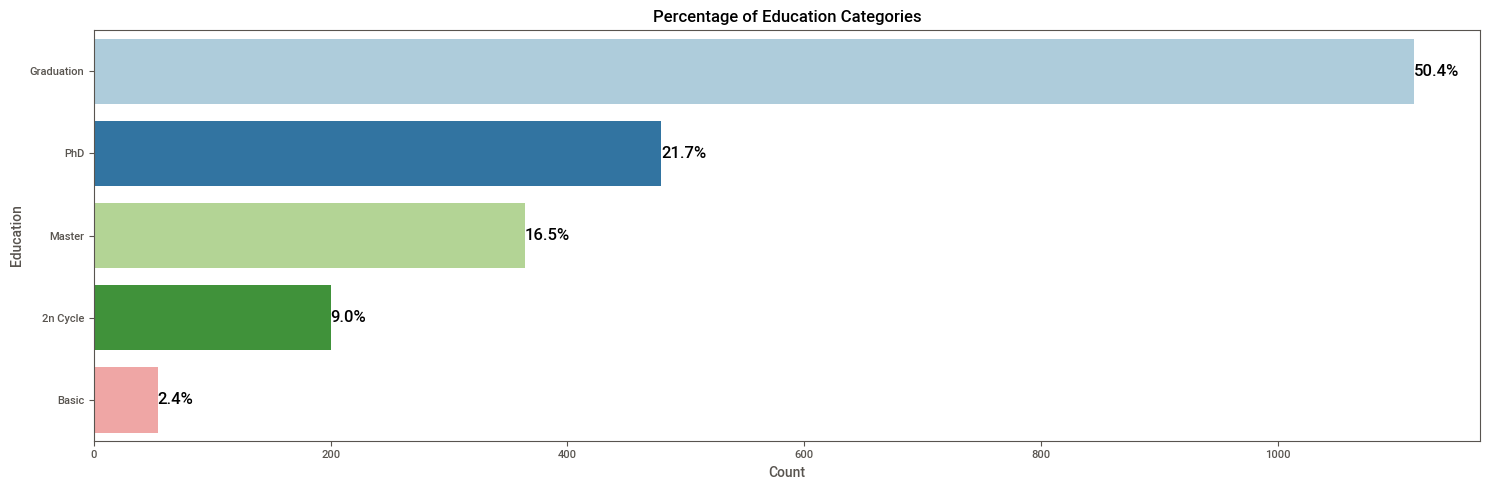

In [57]:
# Bar plot for 'Education'
perc_on_bar_horizontal('Education')

In [58]:
df.Education.value_counts()

Education
Graduation    1115
PhD            479
Master         364
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [59]:
def edu(x):
    education = {
        'Basic'     :'Undergraduate',
        '2n Cycle'  :'Undergraduate',
        'Graduation':'Postgraduate',
        'Master'    :'Postgraduate',
        'PhD'       :'Postgraduate'
    }
    return education[x]

df['Education'] = df.Education.apply(edu)

In [60]:
df.Education.value_counts()

Education
Postgraduate     1958
Undergraduate     254
Name: count, dtype: int64

#### Year since customer’s enrolment with the company

In [61]:
data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object

In [62]:
import pandas as pd
import datetime

def get_different_year():
    # Try to convert the 'Dt_Customer' column to datetime, handling errors
    registration_year = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce').apply(lambda x: x.year)

    # Get current year
    current_year = datetime.datetime.now().year

    # Calculate and return the difference, handling potential NaT (Not a Time) values
    return current_year - registration_year.fillna(current_year) # Fill NaT with current year to avoid errors

In [63]:
# Apply the function and convert to numeric, handling errors
df['Years_Since_Registration'] = get_different_year()
df["Years_Since_Registration"] = pd.to_numeric(df["Years_Since_Registration"], errors="coerce")

In [64]:
df.drop(['Dt_Customer'], axis=1, inplace=True) # no longer need

#### Age

In [65]:
from datetime import datetime
df['Age'] = datetime.now().year - df.Year_Birth

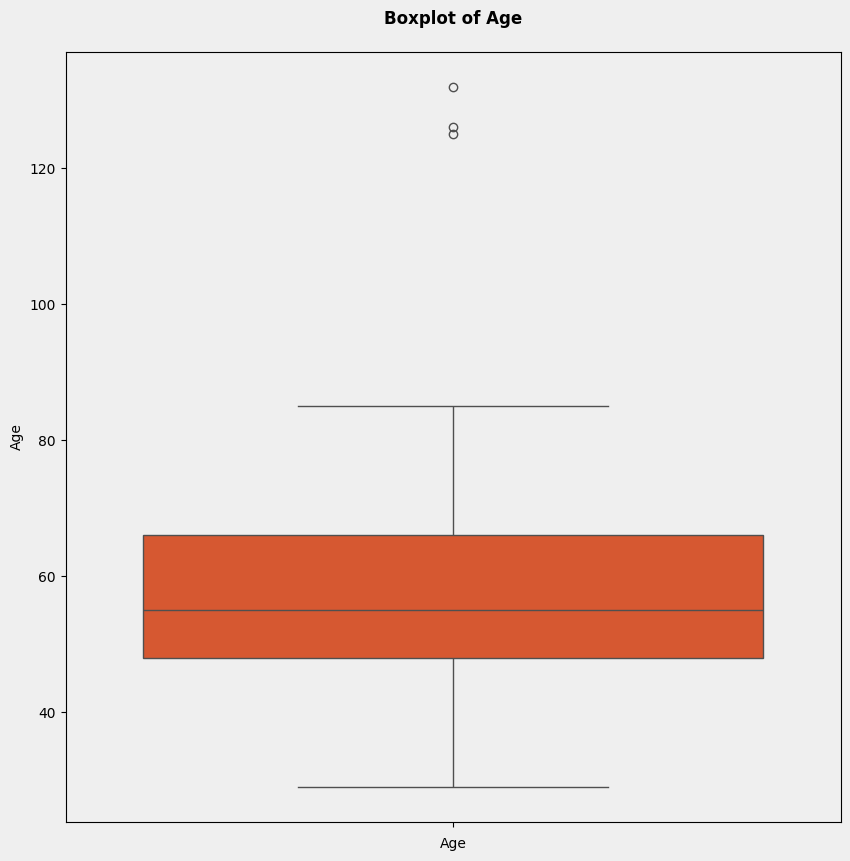

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)  # Reset to default font settings

# Sample data - replace with your actual DataFrame and column
age_data = df['Age']

# Set style and background color
plt.figure(figsize=(10, 10), facecolor='#efefef')  # Light gray background for the figure
ax = sns.boxplot(data=age_data, color='#f14a16')  # Orange boxplot

# Set plot background color to light gray
ax.set_facecolor('#efefef')

# Customize title and labels with DejaVu Sans font and appropriate sizes
plt.title('Boxplot of Age', color='black', fontweight='bold',  pad=20)
plt.xlabel('Age', color='black')
plt.ylabel('Age', color='black')

# Customize x and y ticks with DejaVu Sans font and appropriate sizes
plt.xticks(color='black')
plt.yticks(color='black')

# Show the plot
plt.show()


In [67]:
# Remove outliers
df = df[df['Age'] <= 90]

In [68]:
df.drop(['Year_Birth'], axis=1, inplace=True) # no longer need

In [69]:
df['Age'].describe()

count    2209.000000
mean       56.091897
std        11.696191
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        85.000000
Name: Age, dtype: float64

#### Total children and members living in the household

C:\Users\MAY02\AppData\Local\Temp\ipykernel_12656\2312310877.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[z], palette='Paired', order=df[z].value_counts().index)


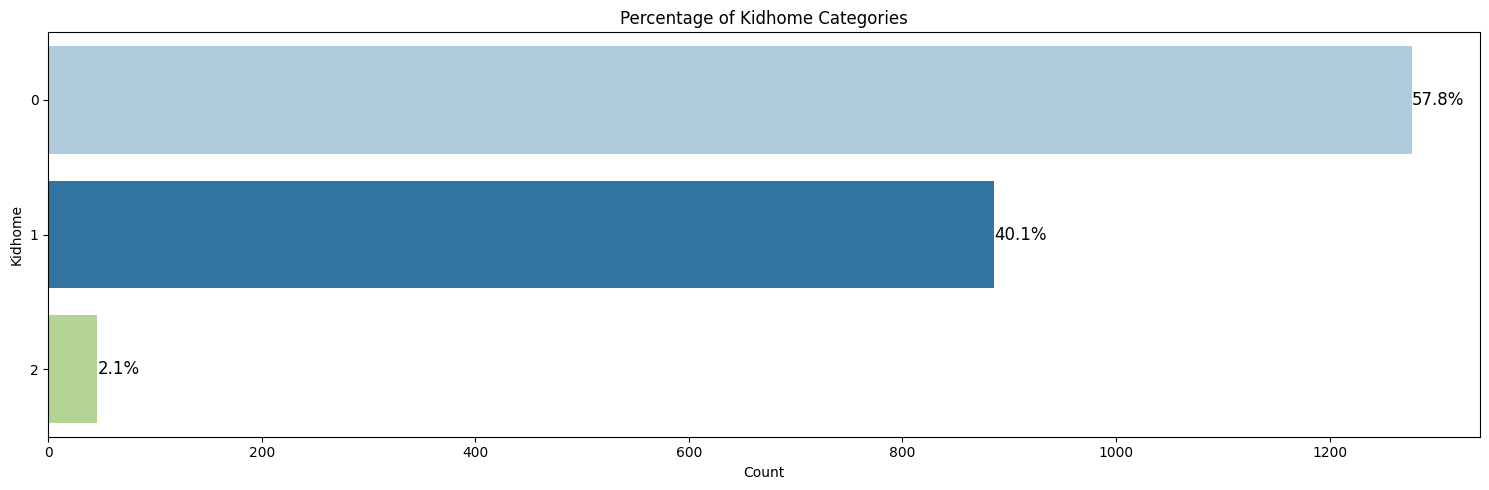

In [70]:
# Bar plot for 'Kidhome'
perc_on_bar_horizontal('Kidhome')

C:\Users\MAY02\AppData\Local\Temp\ipykernel_12656\2312310877.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[z], palette='Paired', order=df[z].value_counts().index)


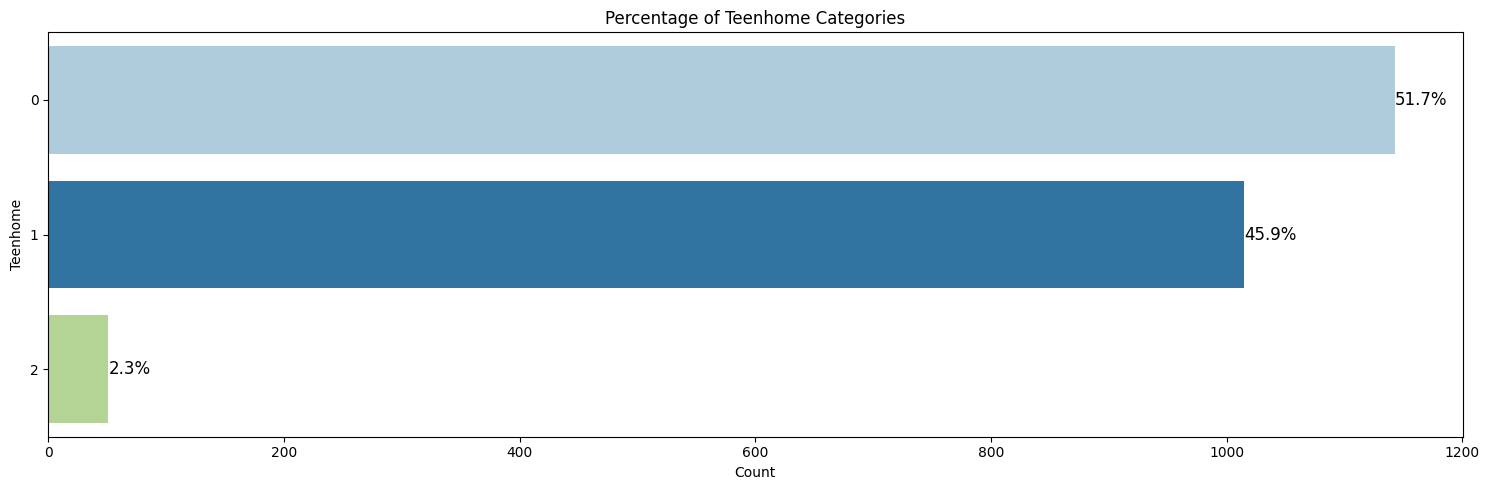

In [71]:
# Bar plot for 'Teenhome'
perc_on_bar_horizontal('Teenhome')

In [72]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [73]:
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True) # no longer need

In [74]:
df["Family_Size"] = pd.to_numeric(df["Marital_Status"].replace({"Alone": 1, "Relationship":2}), errors='coerce')+ df["Children"]

C:\Users\MAY02\AppData\Local\Temp\ipykernel_12656\1119946077.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Family_Size"] = pd.to_numeric(df["Marital_Status"].replace({"Alone": 1, "Relationship":2}), errors='coerce')+ df["Children"]


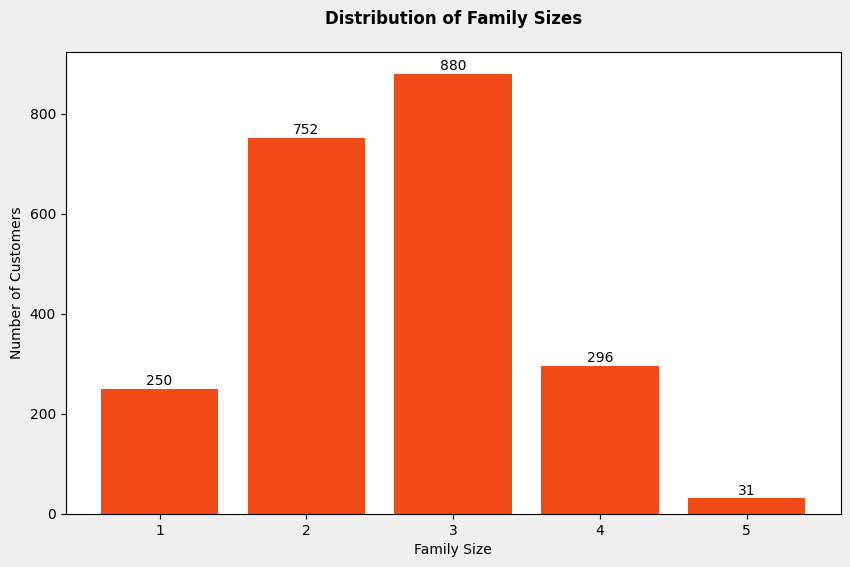

In [75]:
import matplotlib.pyplot as plt

# Assuming df and the necessary columns are defined as in the provided code

# Calculate family size counts
family_size_counts = df["Family_Size"].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6), facecolor='#efefef')  # Adjust figure size as needed
bars = plt.bar(family_size_counts.index, family_size_counts.values, color='#f14a16')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1 , yval, ha='center', va='bottom')

plt.xlabel("Family Size")
plt.ylabel("Number of Customers")
plt.title("Distribution of Family Sizes", fontweight='bold', pad=20)
plt.show()

In [76]:
df['Education'].info()

<class 'pandas.core.series.Series'>
Index: 2209 entries, 0 to 2239
Series name: Education
Non-Null Count  Dtype 
--------------  ----- 
2209 non-null   object
dtypes: object(1)
memory usage: 34.5+ KB


#### **Spending**: Total spendings on various items

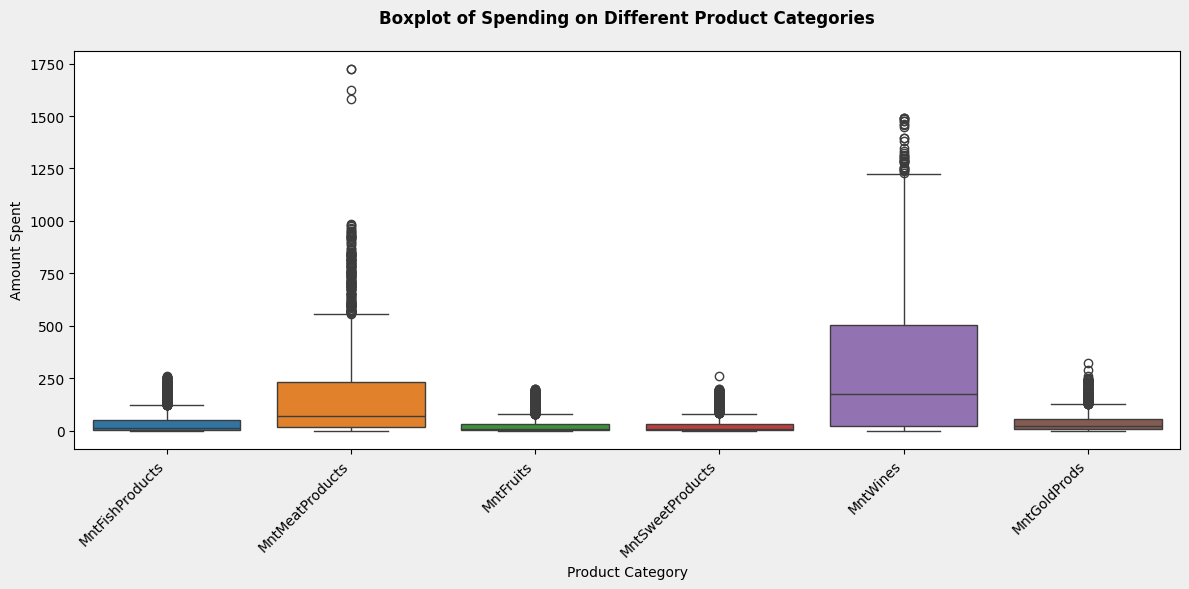

In [77]:
# MntMeatProducts - amount spent on meat products in the last 2 years
# MntFruits - amount spent on fruits products in the last 2 years
# MntSweetProducts - amount spent on sweet products in the last 2 years
# MntWines - amount spent on wine products in the last 2 years
# MntGoldProds - amount spent on gold products in the last 2 years

spend_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

# Create the boxplot
plt.figure(figsize=(12, 6), facecolor='#efefef')  # Adjust figure size for better readability
sns.boxplot(data=df[spend_columns])
plt.title('Boxplot of Spending on Different Product Categories', fontweight='bold', pad=20)
plt.xlabel('Product Category')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

=> Comment:
- **Wine** and **Meat**  categories show the highest spending among customers. Wine have the most extreme outliers, representing a small segment of customers who spend disproportionately more than the average
- The significant split around the median in **wine** and **meat** spending indicates the presence of two distinct customer behaviors: a large group of low to moderate spenders and a smaller group of high spenders.


In [78]:
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"] + \
              df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#### **TotalAcceptedCmp**: Total number of accepted campaigns by a customer

In [79]:
# "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
df["TotalAcceptedCmp"] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

#### Income

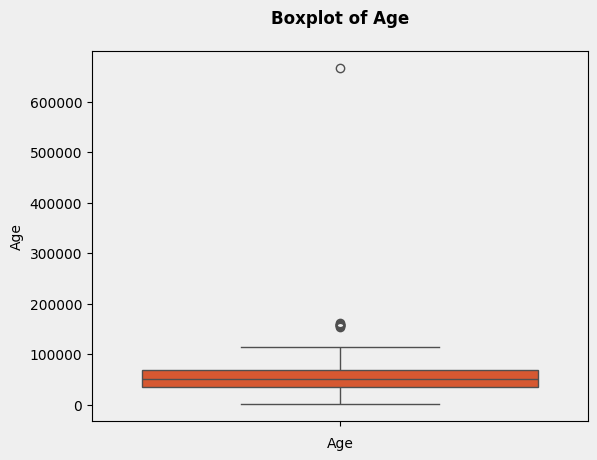

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)  # Reset to default font settings

# Sample data - replace with your actual DataFrame and column
age_data = df['Income']

# Set style and background color
plt.figure(facecolor='#efefef')  # Light gray background for the figure
ax = sns.boxplot(data=age_data, color='#f14a16')  # Orange boxplot

# Set plot background color to light gray
ax.set_facecolor('#efefef')

# Customize title and labels with DejaVu Sans font and appropriate sizes
plt.title('Boxplot of Age', color='black', fontweight='bold',  pad=20)
plt.xlabel('Age', color='black')
plt.ylabel('Age', color='black')

# Customize x and y ticks with DejaVu Sans font and appropriate sizes
plt.xticks(color='black')
plt.yticks(color='black')

# Show the plot
plt.show()


In [81]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with Income outside the bounds
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

In [82]:
df['Income'].describe()

count      2201.000000
mean      51606.144480
std       20721.181896
min        1730.000000
25%       35178.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

### Complain

C:\Users\MAY02\AppData\Local\Temp\ipykernel_12656\2312310877.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[z], palette='Paired', order=df[z].value_counts().index)


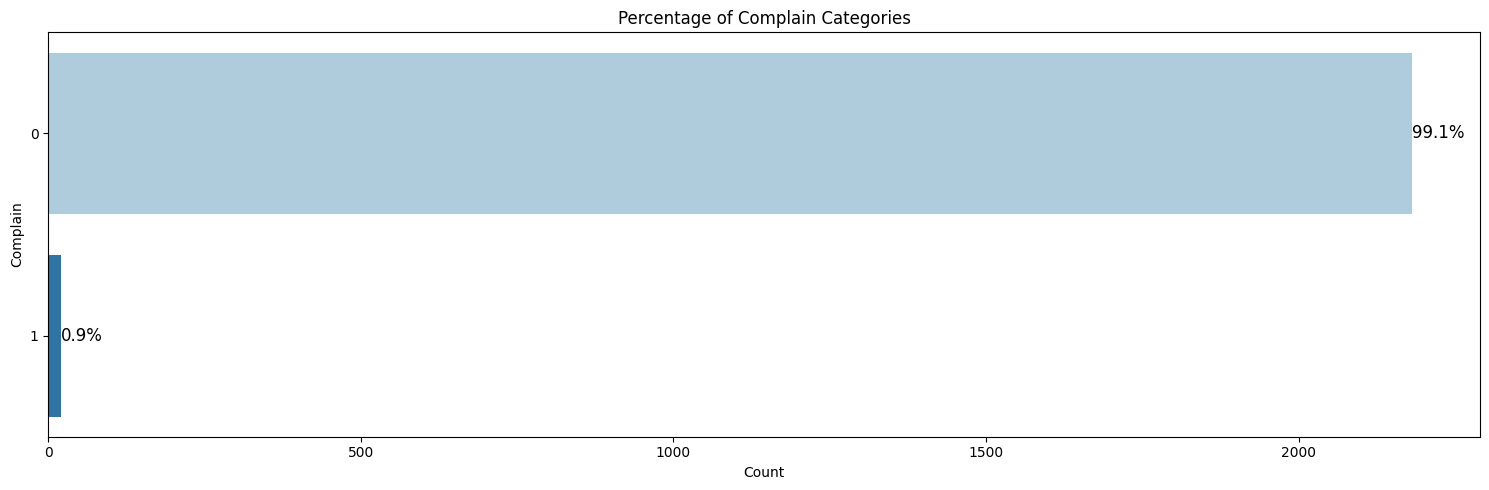

In [83]:
# Bar plot for 'Complain'
perc_on_bar_horizontal('Complain')

Comment: Key observations from all plots can be derived as below:
- Most of the customers are Married followed by Together or Single.
- More than half of the customers have a Graduation level of education. Customers with a Master or PhD level of education almost make up the other half. Only 2.4% of the customers in this dataset have a Basic level of education.
- More than half (57.7%) of customers have 0 small children in their household.
- The distribution for number of teenagers in a customer's household is very similar to the distribution for number of small children in a customer's household.
- Almost all the customers in this dataset have not complained in the last 2 years (99.1%).

### New Dataframe

In [84]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True) # no description provided

In [85]:
df.describe()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Years_Since_Registration,Age,Children,Family_Size,Spent,TotalAcceptedCmp
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,...,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,5584.809632,51606.144480,49.047251,306.105407,26.371649,165.283053,37.634711,27.147206,43.913676,2.316220,...,0.064062,0.013630,0.009087,0.150386,11.971377,56.104952,0.949568,2.595638,606.455702,0.449341
std,3246.102409,20721.181896,28.924487,337.778943,39.772318,217.836140,54.630912,41.151010,51.543122,1.885822,...,0.244919,0.115976,0.094912,0.357531,0.685299,11.701763,0.749364,0.905568,601.937286,0.893054
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,11.000000,29.000000,0.000000,1.000000,5.000000,0.000000
25%,2815.000000,35178.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,48.000000,0.000000,2.000000,69.000000,0.000000
50%,5455.000000,51287.000000,49.000000,176.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,55.000000,1.000000,3.000000,396.000000,0.000000
75%,8418.000000,68281.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,66.000000,1.000000,3.000000,1045.000000,1.000000
max,11191.000000,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,13.000000,85.000000,3.000000,5.000000,2525.000000,5.000000


In [86]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


## **C. Data Visualization**

In this **section C**, we would like to gain more insights from this dataset by exploring the relationship between variables.

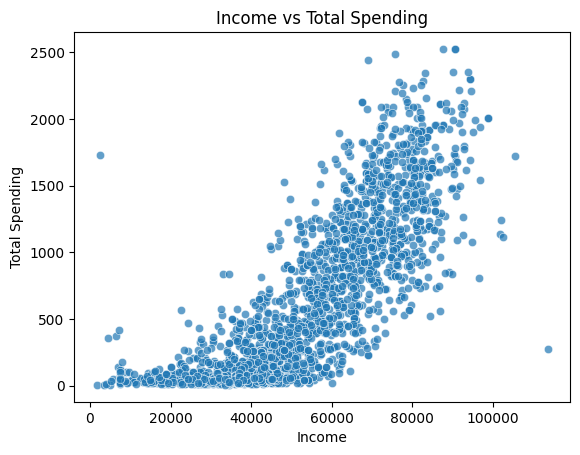

In [87]:
# Plot1: Income vs Total Spending (scatter plot without regression line)
plt.figure()
sns.scatterplot(x='Income', y='Spent', data=df, alpha=0.7)
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

C:\Users\MAY02\AppData\Local\Temp\ipykernel_12656\1651067182.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('Income_Bin')[place_columns].mean().reset_index()


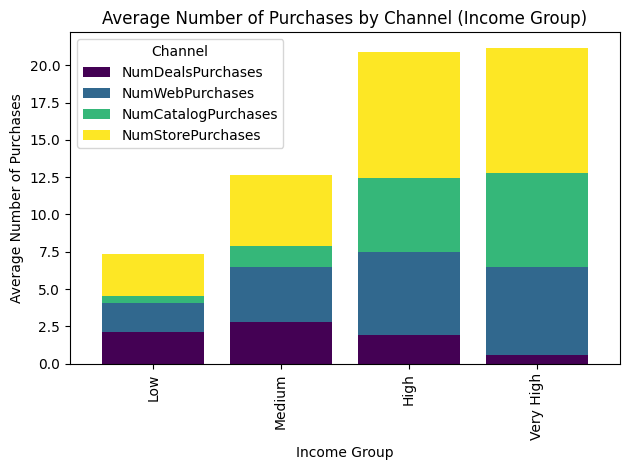

In [88]:
# Create income bins to categorize income levels
df['Income_Bin'] = pd.cut(df['Income'], bins=[0, 30000, 60000, 90000, 120000],
                          labels=['Low', 'Medium', 'High', 'Very High'])
place_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Group by income bins and calculate mean for place of purchase columns
df_grouped = df.groupby('Income_Bin')[place_columns].mean().reset_index()

# Plot2: Stacked bar plot for average number of purchases by income group
df_grouped.plot(x='Income_Bin', kind='bar', stacked=True, cmap='viridis', width=0.8)
plt.title('Average Number of Purchases by Channel (Income Group)')
plt.xlabel('Income Group')
plt.ylabel('Average Number of Purchases')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

As can be derived from the 2 plots above, we can see some key information:
* There is a positive correlation between total spend and income of customers. As income increases, total spending also tends to increase, indicating that higher-income customers generally spend more.
* Spending behavior varies significantly by income group in terms of place of purchase:
 * Store purchases (yellow) and Web purchases (blue) form the largest portion of spending across all income groups.
 * Catalog purchases (green) increase significantly for higher-income groups, suggesting that wealthier customers may prefer more traditional purchasing methods like catalogs.
 * Deal purchases (purple) tend to decrease with income, implying that promotional campaigns and discounts are more appealing to lower-income customers..


C:\Users\MAY02\AppData\Local\Temp\ipykernel_12656\234812688.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_age = df.groupby('Age_Group')[product_columns].sum().div(df.groupby('Age_Group')[product_columns].sum().sum(axis=1), axis=0)
C:\Users\MAY02\AppData\Local\Temp\ipykernel_12656\234812688.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_age = df.groupby('Age_Group')[product_columns].sum().div(df.groupby('Age_Group')[product_columns].sum().sum(axis=1), axis=0)
C:\Users\MAY02\AppData\Local\Temp\ipykernel_12656\234812688.py:14: FutureWarning: The default of observed=False is dep

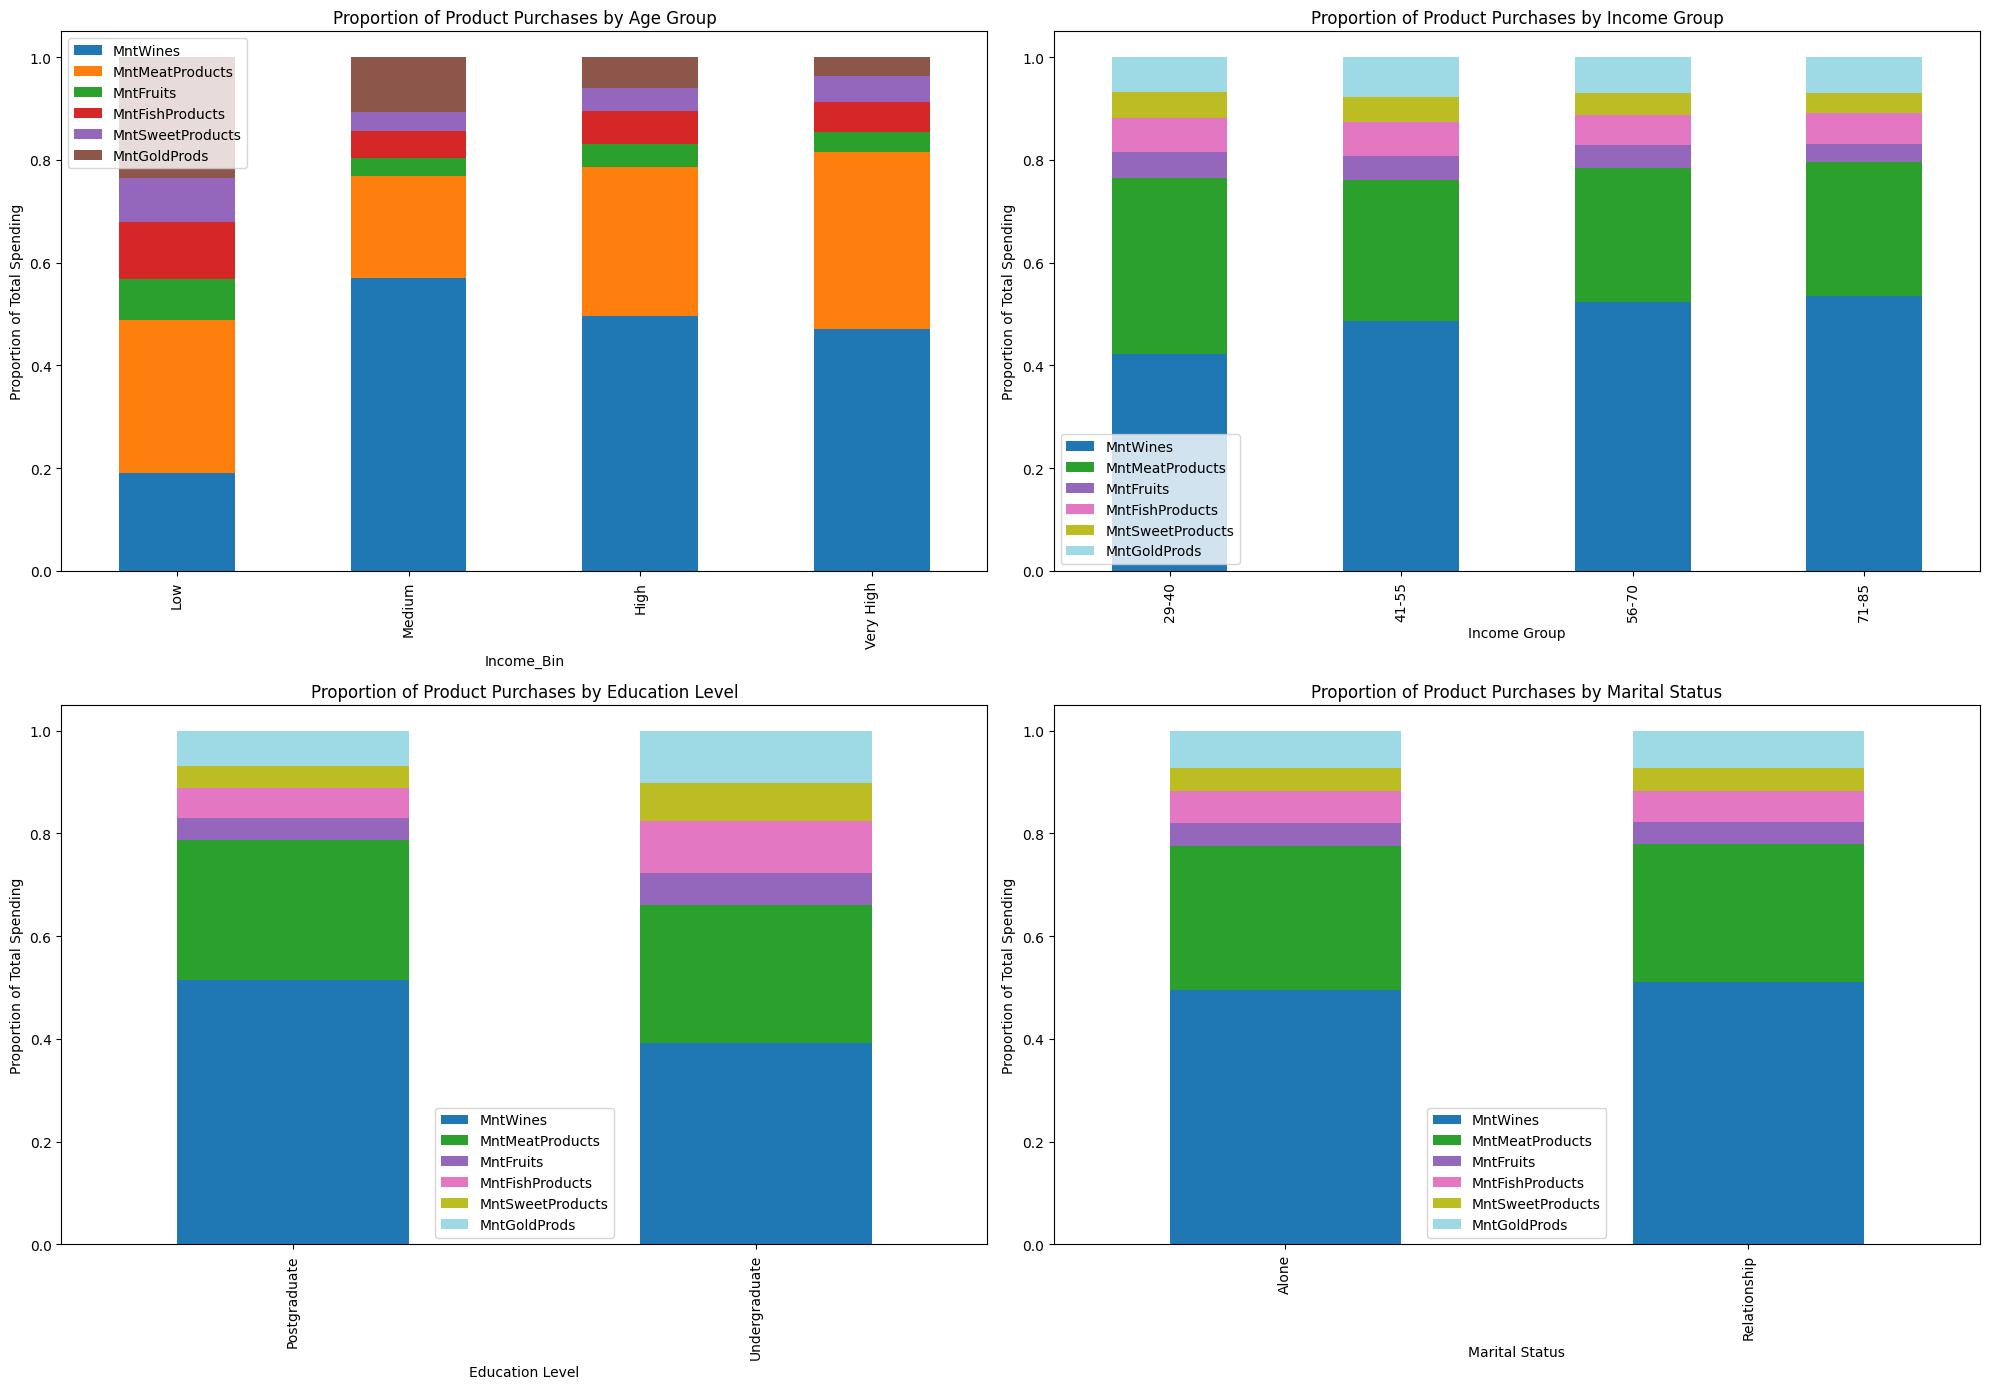

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Define product columns
product_columns = ['MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Define age bins and labels
age_bins = [29, 40, 55, 70, 85]
age_labels = ['29-40', '41-55', '56-70', '71-85']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Grouping data for different categories
df_grouped_age = df.groupby('Age_Group')[product_columns].sum().div(df.groupby('Age_Group')[product_columns].sum().sum(axis=1), axis=0)
df_grouped_income = df.groupby('Income_Bin')[product_columns].sum().div(df.groupby('Income_Bin')[product_columns].sum().sum(axis=1), axis=0)
df_grouped_education = df.groupby('Education')[product_columns].sum().div(df.groupby('Education')[product_columns].sum().sum(axis=1), axis=0)
df_grouped_marital = df.groupby('Marital_Status')[product_columns].sum().div(df.groupby('Marital_Status')[product_columns].sum().sum(axis=1), axis=0)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Plot 3.1. for Age Group
df_grouped_age.plot(kind='bar', stacked=True, ax=axes[0, 1], cmap='tab20')
axes[0, 0].set_title('Proportion of Product Purchases by Age Group')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Proportion of Total Spending')

# Plot 3.2.  for Income Group
df_grouped_income.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 1].set_title('Proportion of Product Purchases by Income Group')
axes[0, 1].set_xlabel('Income Group')
axes[0, 1].set_ylabel('Proportion of Total Spending')

# Plot 3.3.  for Education
df_grouped_education.plot(kind='bar', stacked=True, ax=axes[1, 0], cmap='tab20')
axes[1, 0].set_title('Proportion of Product Purchases by Education Level')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Proportion of Total Spending')

# Plot 3.4. for Marital Status
df_grouped_marital.plot(kind='bar', stacked=True, ax=axes[1, 1], cmap='tab20')
axes[1, 1].set_title('Proportion of Product Purchases by Marital Status')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Proportion of Total Spending')

# Adjust layout
plt.tight_layout()
plt.show()


Comment: As mentioned in ***Spending*** part above, there are 2 categories show the highest spending among customers and extreme outliers, which is **Wine** and **Meat** categories. The main reason lies in the income group, as it has a significantly different spending pattern compared to other variables, while the other variables exhibit similar patterns across groups:
- Lower-income groups tend to spend more on daily essentials (e.g., meat, fruits, and fish), which is different from other groups who spend a larger proportion on wines.
- The proportion of gold product purchases decreases from lower-income groups to higher-income groups, suggesting that lower-income groups tend to spend more on valuable assets like gold rather than on luxury items like wine.
- For age groups, education levels, and marital status, the proportion of spending remains relatively consistent across categories, indicating that these factors have less influence on product preference compared to income.

In [90]:
# Creating a subset of the dataframe with relevant features for correlation analysis
selected_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                    'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                    'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

sub_df = df[selected_columns]

# Calculating the correlation matrix
corr_matrix = sub_df.corr()

# Plot4: Plotting the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()


KeyError: "['Year_Birth', 'Kidhome', 'Teenhome'] not in index"

Comment:

- There is a strong positive correlation between expenses and amount spent on wine and meat products in the past 2 years. This may suggest that these are more expensive products that greatly contributes to a customer's overall expenses.
- There is also a strong positive correlation between amount spent on wine products in the past 2 years and amount spent on meat products in the past 2 years, number of purchases made through the company's website, number of purchases made using a catalog, number of purchases made directly in stores, number of total purchases from each channel, total campaigns accepted, and amount spent per purchase.
- Number of visits to the company's website in the last month has a moderately strong negative correlation to amount spent on wine, fruits, meat, fish, sweet, and gold products in the past 2 years.
- There is a strong positive correlation between number of total purchases and number of purchases made through the company's website or directly in stores.
- There is also a strong positive correlation between number of purchases made using a catalog and expenses.
- The negative correlation between number of visits to the company's website in the last month and number of purchases made using a catalog or directly in stores makes sense because if customers are using these channels to make purchases, they probably don't have to visit the company's website.
- The moderately strong positive correlation between expenses and number of total purchases and amount per purchase makes sense because if a customer spends more, they probably made more purchases and spent more for each purchase.
-There is a negative correlation between expenses and number of visits to the company's website in the last month.

## **D. Data Preprocessing**

In this **section D**, we apply feature scaling to prepare the dataset for clustering. Scaling is critical for distance-based algorithms like K-Means, as features with larger numerical ranges (e.g., income) could dominate the clustering process, leading to biased results.

* Label Encoding Categorical Variables
 * Categorical features (Education, Marital_Status) are encoded using LabelEncoder to convert them into numerical values.

* Dropping Irrelevant Features
 * Features related to promotions (AcceptedCmp1, AcceptedCmp2, etc.) are excluded, as they represent marketing outcomes rather than core customer behavior, ensuring unbiased clustering.

* Standard Scaling
 * Apply StandardScaler to ensure all features have a mean of 0 and standard deviation of 1, so they contribute equally to the clustering process.

By the end of this step, the data is ready for clustering with all features properly scaled.

In [ ]:
df.info()

In [ ]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

In [ ]:
# Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
"""these features are not direct indicators of customer behavior but rather outcomes of past promotions,
   include them may bias the clustering process toward recent campaigns rather than actual customer traits."""

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Income_Bin','Age_Group']
ds = ds.drop(cols_del, axis=1)

In [ ]:
# Scaling: ensures that all features contribute equally by transforming them to have a mean of 0 and standard deviation of 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

# **3. Dimensionality Reduction**



The higher the number of features, the harder it is to work with it for clustering. Many of these features are correlated, hence redundant and it causes multicollinearity, which affects the clustering method and results in poor cluster profiling (or biased toward a few variables). This is why we will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.*

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, we will reduce the dimensions to 3.

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

In [ ]:
PCA_ds

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **của chị đến đây hết rồi nhé m đừng có động vào**


Customer Analytics by <u>**STP**</u> : Segmentation, Targeting and Positioning <br>
**1-Segmentation:** dividing a population into groups that share similar charachteristics.<br>
**2-Targeting:** evaluating potential profits from segments and deciding which segment to focus on.<br>
**3-Positioning:** what product would have the closest characteristics to customers' need.  


<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SEGMENTATION</p>


**Main benefits of segmentation:**
<ol><li>Increase sales/revenue
<li>Improve marketing
<li>Increase customer retention / decrease churn
</ol>

Now that I have reduced the attributes to three dimensions, I will be performing segmentation by clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

In [ ]:
from yellowbrick.cluster import KElbowVisualizer


In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering



**Average silhouette method**
*italicized text*



In [ ]:
scaled_ds

In [ ]:
# Credit
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.8, 0.8])

    ax1.set_ylim([0, len(scaled_ds) + (n_clusters + 1) * 10])

    # Cluster
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(PCA_ds)

    silhouette_avg = silhouette_score(ds, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(ds, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.8, -0.6, -0.4, -0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_ds['MntWines'], scaled_ds['Income'], marker=".", s=30, lw=0, alpha=0.7, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

**Sử dụng elbow method tìm số cụm**

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
Thong dich ket qua


---

**Sử dụng agglomerative (Chiến lược hợp nhất để phân cụm)**

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
scaled_ds["Clusters"]= yhat_AC

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Define a colormap (e.g., 'viridis')
cmap = 'viridis'

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATING MODELS</p>

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

**Firstly, let us have a look at the group distribution of clustring**

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=scaled_ds["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
pl = sns.scatterplot(data = data,x=scaled_ds["Spent"], y=scaled_ds["Income"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
plt.figure()
pl=sns.swarmplot(x=scaled_ds["Clusters"], y=scaled_ds["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=scaled_ds["Clusters"], y=scaled_ds["Spent"])
plt.show()

Cụm 0: Nhóm khách hàng này có mức chi tiêu thấp nhất trong tất cả các cụm. Phần lớn các điểm dữ liệu tập trung quanh mức chi tiêu trung bình thấp, với một số ít khách hàng chi tiêu cao hơn nhưng không đáng kể.

Cụm 1: Nhóm này có mức chi tiêu cao hơn cụm 0, nhưng vẫn ở mức trung bình thấp. Phân phối dữ liệu tương đối hẹp, tức là các khách hàng trong cụm này có hành vi chi tiêu khá đồng đều.

Cụm 2: Đây là cụm có mức chi tiêu cao nhất. Các hộp và điểm dữ liệu cho thấy rằng có nhiều khách hàng chi tiêu ở mức cao hơn trung bình, với một số khách hàng có mức chi tiêu vượt trội (outliers).

Cụm 3: Cụm này có mức chi tiêu trung bình, thấp hơn cụm 2 nhưng cao hơn cụm 0 và cụm 1. Sự phân tán dữ liệu của cụm này cũng khá rộng, cho thấy sự đa dạng trong hành vi chi tiêu của khách hàng thuộc nhóm này.

### ***Chúng ta hãy xem xem hiệu quả của các chiến dịch tiếp thị trong quá khứ là như nào ***

In [ ]:
scaled_ds.columns

In [ ]:
#Creating a feature to get a sum of accepted promotions
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

Các chiến dịch tiếp thị trước đây chưa nhận được phản hồi tích cực. Số lượng khách hàng tham gia tổng thể rất ít, và đặc biệt, không có ai tham gia cả 5 chiến dịch. Các chiến dịch cần có mục tiêu tốt hơn và lên kế hoạch kỹ lưỡng hơn để tăng doanh số bán hàng.


In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()


Trái ngược với các chiến dịch tiếp thị, các chương trình khuyến mãi đã đạt được hiệu quả tốt, đặc biệt với cụm 1,0 và 3. Tuy nhiên, nhóm khách hàng quan trọng nhất của chúng ta, cụm 2, lại không tham gia nhiều vào các chương trình khuyến mãi này. Điều này cho thấy cần phải thiết kế các chương trình khuyến mãi phù hợp hơn để thu hút sự quan tâm của nhóm khách hàng tiềm năng này.

In [ ]:
#for more details on the purchasing style
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"]

for i in Places:
    plt.figure()
    sns.jointplot(x=df[i],y = df["Spent"],hue=df["Clustersb"])
    plt.show()

Profiling the clusters
Sau khi đã hình thành các cụm và phân tích thói quen mua sắm của từng cụm, chúng ta sẽ tìm hiểu cụ thể từng nhóm khách hàng trong các cụm này. Để thực hiện điều đó, em sẽ tiến hành profiling (lập hồ sơ) cho các cụm đã được tạo và đưa ra kết luận về nhóm khách hàng nào là "ngôi sao" (star customer) và nhóm nào cần sự chú ý nhiều hơn từ đội ngũ tiếp thị của cửa hàng bán lẻ.

Để xác định điều này, em sẽ vẽ biểu đồ một số đặc trưng mang tính chất cá nhân của khách hàng, liên quan đến cụm mà họ thuộc về. Dựa trên kết quả phân tích, em sẽ rút ra kết luận nhằm hỗ trợ việc tối ưu hóa chiến lược kinh doanh và tiếp thị.

In [ ]:
=> chien luoc tiep thi

In [ ]:
df

In [ ]:
data.columns

In [ ]:
Personal = [ "Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=df["Spent"], hue =df["Clusters"], kind="kde")
    plt.show()

Cluster 0: High-Income Customers Consists of 583 customers Spend a lot and don't tend to make purchases through the company’s website or with a discount Average income of 74,435.61 Spends significantly more compared to the other clusters with an average total amount spent of 1,362.68 and average of 71.11 spent per purchase Spend the most on wine, fruit, meat, fish, sweet, and gold products in the last 2 years Highest average for purchases made using a catalog or directly in store Average age of 48 Don't have kids Highest average for accepting the offers in campaigns 1, 2, 3, 4, 5, and the last campaign


Cluster 1: Low-Income Customers
Twice as big as the other two clusters with a total of 1,072 customers
Don’t spend a lot and make more purchases through the company’s website using a discount
Spend the least on average for all the products in this dataset
Average income for customers in this cluster is 35,708.22
Spend an average total amount of 112.64 and only 11.81 per purchase
On the younger side compared to the other two clusters with an average age of about 45
Have a small child in their household


Cluster 2: Medium-Income Customers
Consists of 572 customers
Spend a medium amount and seem to make the most purchases through the company’s website using a discount compared to the customers in the other two clusters
Average income for this group is 58,347.45
Generally older as the average age is about 50
In a relationship
Have a teenager in the household
Average amount these customers spend is 759.70 with an average of 34.94 per purchase
Make the most purchases
Been with the company the longest

Cluster Analysis

DBSCAN

In [ ]:
import sweetviz as sv
report = sv.analyze(df)
